### imports


In [1]:
import numpy as np
import pandas as pd
import string

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from collections import Counter

from wordcloud import WordCloud


#Training Models:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline


In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3891,spam,URGENT This is our 2nd attempt to contact U. Y...,NaN,NaN,NaN
2628,ham,Haha... They cant what... At the most tmr forf...,NaN,NaN,NaN
4008,ham,Ha... Then we must walk to everywhere... Canno...,NaN,NaN,NaN
190,spam,Are you unique enough? Find out from 30th Augu...,NaN,NaN,NaN
4590,spam,Well done ENGLAND! Get the official poly ringt...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### Data cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# dropping last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.sample(5)

,v1,v2
2505,ham,Congrats kano..whr s the treat maga?
967,ham,What do u want when i come back?.a beautiful n...
5023,ham,Where you. What happen
3426,ham,Haha okay... Today weekend leh...
2140,ham,After the drug she will be able to eat.


In [7]:
# Renaming columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
4931,ham,Match started.india &lt;#&gt; for 2
5469,ham,Ok lor.
3481,spam,Do you want a NEW video phone750 anytime any n...
1907,ham,ELLO BABE U OK?
1224,spam,You are a winner U have been specially selecte...


In [8]:
encoder =LabelEncoder()

df['target']=encoder.fit_transform(df['target'])

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Checking missing and duplicate values


In [9]:
# checking missing values
df.isnull().any()
# we can also do 
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# checking duplicated values
df.duplicated().any()
df.duplicated().sum()

403

In [11]:
# Removing duplicate values
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()


0

In [12]:
df.shape

(5169, 2)

### Exlporatory Data Analysis (EDA)


In [13]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

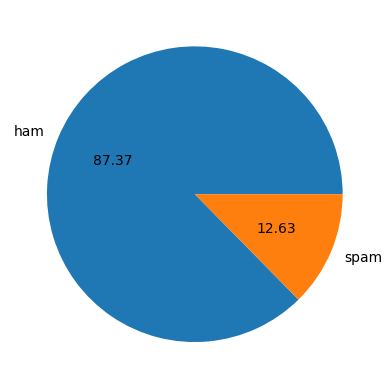

In [14]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct= '%0.2f')
plt.show()
# Observing the pie chart we can know that the dataframe is imbalanced.

In [15]:
# checking if the msgs are numm or not
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
# number of words in each msg
# df['text'].apply(lambda x: len(x.split()))
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [17]:
# number of sentences in each msg
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
# visualizing the distribution 
df[['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
# For ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# For spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### Plotting histographs


sns.histplot -> plots multiple datas in a single histgraph
sns.displot -> plots multiple datas in different histgraph

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

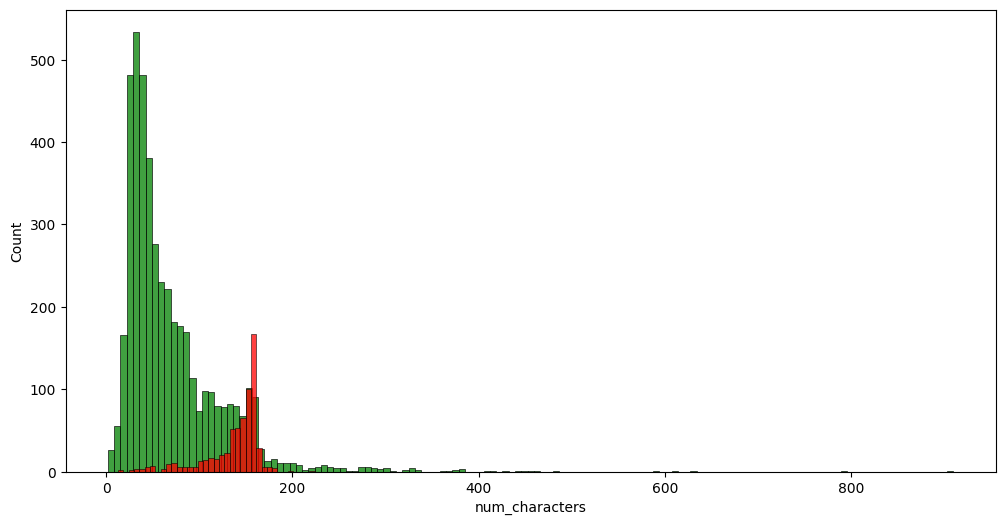

In [21]:
plt.figure(figsize=(12,6))
# visualizing the distribution of num_characters of ham sms
sns.histplot(df[df['target']==0]['num_characters'],color='green',label='ham')
# visualizing the distribution of num_characters of spam sms
sns.histplot(df[df['target']==1]['num_characters'],color='red',label='spam')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

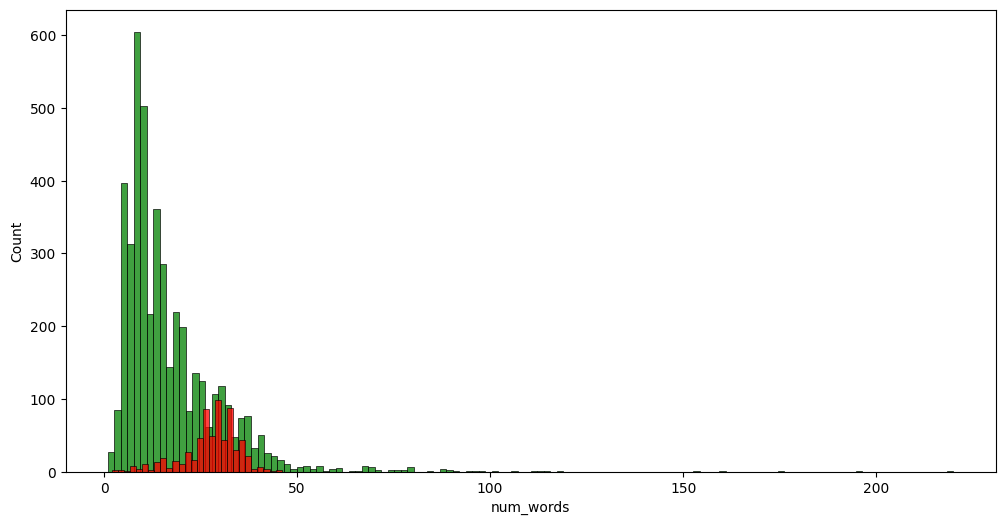

In [22]:
plt.figure(figsize=(12,6))
# visualizing the distribution of num_words of ham sms
sns.histplot(df[df['target']==0]['num_words'],color='green',label='ham')
# visualizing the distribution of num_words of spam sms
sns.histplot(df[df['target']==1]['num_words'],color='red',label='spam')

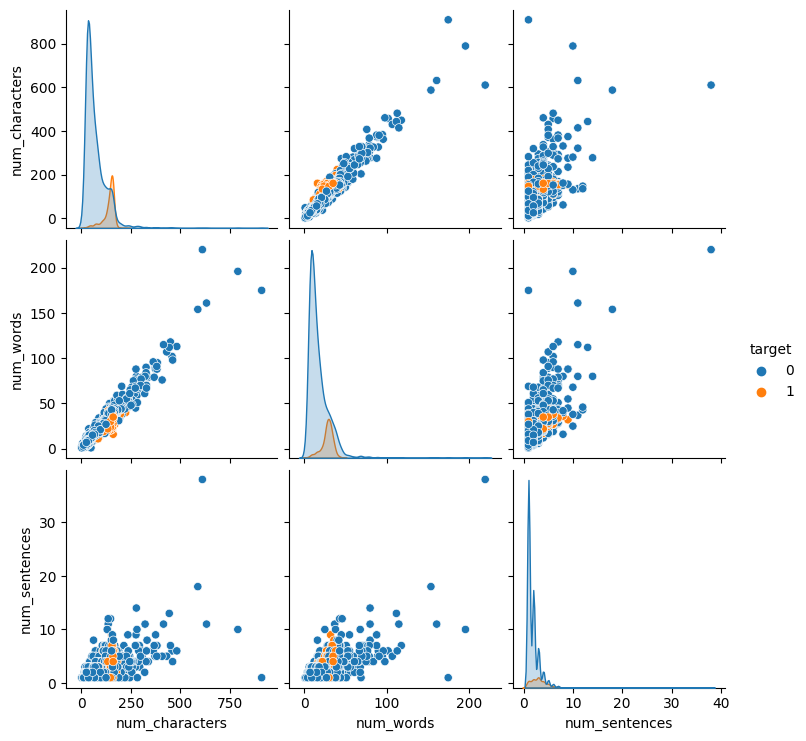

In [23]:
sns.pairplot(df,hue='target')

C:\Users\Sulav Bhandari\AppData\Local\Temp\ipykernel_12084\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

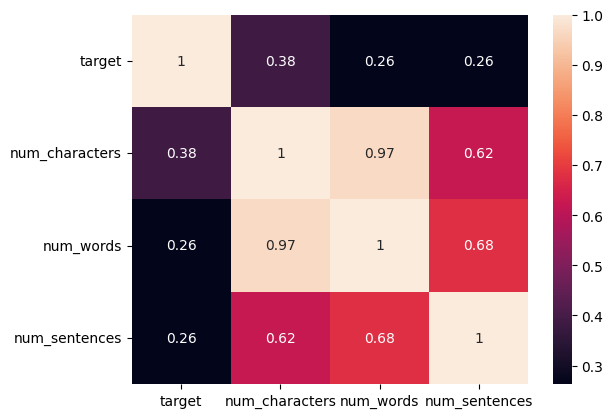

In [24]:
sns.heatmap(df.corr(),annot=True)

### Data Preprocessing

1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuaions
5. Stemming


In [25]:
# Accessing the text column
# df['text']  for accessing the text column
df['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [26]:
# Stop words
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
# Punctiations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
# Stemming(Converting to root word)
ps = PorterStemmer()
ps.stem('loving')

'love'

In [29]:
def transform_text(text):
    text=text.lower() # converting to lower case
    text = nltk.word_tokenize(text) # tokenizing
    text = [word for word in text if word.isalnum()] # removing special characters only. ( isalpha() will be true for word in text containing alphabets and numbers only.)
    # removing stopwords and punctuations
    text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]
    text = [PorterStemmer().stem(word) for word in text] # stemming
    # returning the text as a string
    return ' '.join(text)

In [30]:
# Just Checking the function
transform_text('Do you love me enough? I am hating you 3000!!!')


'love enough hate 3000'

In [31]:
# applying the function to the dataframe as a new column
df['transformed_text']=df['text'].apply(transform_text)

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


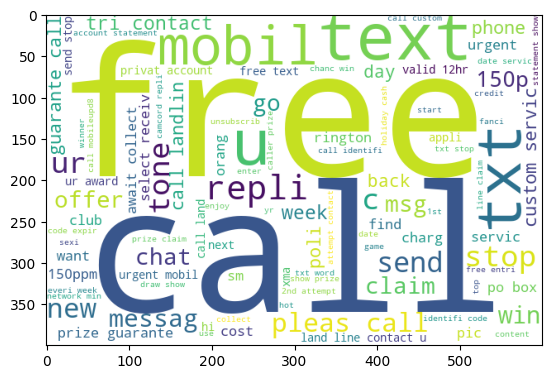

In [33]:
# WordCloud for ham messages
spam_wc= WordCloud(width=600,height=400,background_color='white',max_words=100).generate(" ".join(df[df['target']==1]['transformed_text']))
# plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

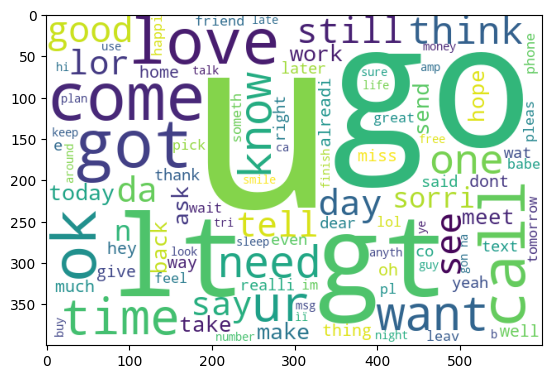

In [34]:
# WordCloud for ham messages
ham_wc= WordCloud(width=600,height=400,background_color='white',max_words=100).generate(" ".join(df[df['target']==0]['transformed_text']))
# plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [35]:
# getting all the spam msgs as a list
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


# getting all the ham msgs as a list
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


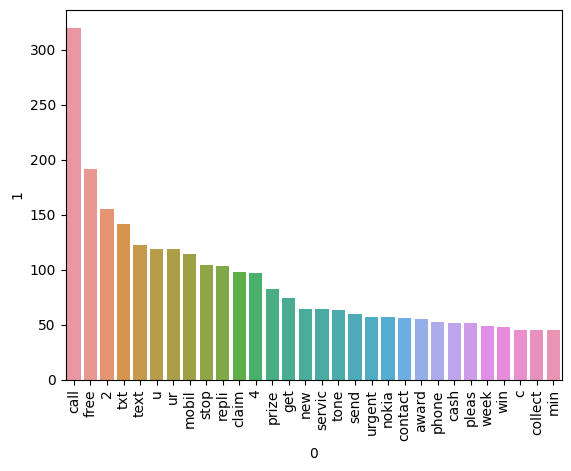

In [36]:
# plotting top 30 words of spam msgs in a barplot
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()


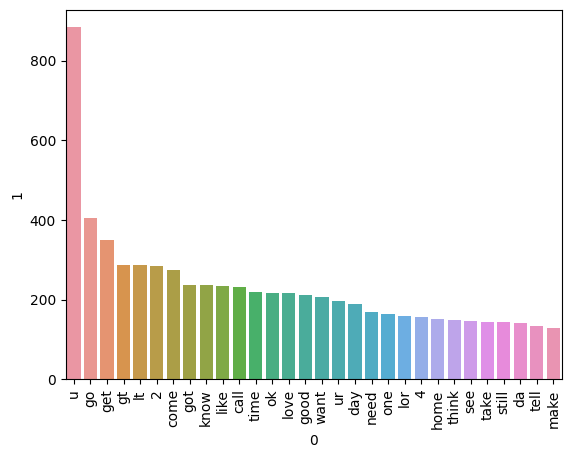

In [37]:
# plotting top 30 words of ham msgs in a barplot
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

# Model Building

In [67]:
cv= CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000) #on improving model max_features was set to 3000


In [68]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [40]:
# scaler = MinMaxScaler()
# X=scaler.fit_transform(X)

In [41]:
# appending the num_characters column to X
# X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))
# X.shape

In [69]:
y = df['target'].values

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
gnb= GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [72]:
# GaussianNB
gnb.fit(X_train, y_train)
ypred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, ypred_gnb))
print(confusion_matrix(y_test, ypred_gnb))
print(precision_score(y_test, ypred_gnb))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


##### (Both tfidf and cv): This is a precision based model and the precision score is 0.53 which is very low so we can't use this model

In [73]:
# MultinomialNB
mnb.fit(X_train, y_train)
ypred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, ypred_mnb))
print(confusion_matrix(y_test, ypred_mnb))
print(precision_score(y_test, ypred_mnb))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


#### (cv): Precision is higher than earlier model but we would check for other models if they stand out more than this because 0.83 is still not that good in this type of precison based model
#### (tfidf):  The precision is highly improved and is 1.0 so the model is quite reliable and the accuracy is also quite high at 0.95


In [47]:
# BernoulliNB
bnb.fit(X_train, y_train)
ypred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, ypred_bnb))
print(confusion_matrix(y_test, ypred_bnb))
print(precision_score(y_test, ypred_bnb))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


#### ( Both cv and tfidf): We can see the precision is quite high at 0.97 and also the acc is high at 0.97 so this model seems to give good results in our dataset

### (Using tfidf--->mnb): Reviewing both cv and tfidf method we have concluded using tfidf with mnb in our project because of its high precision and our model need to be precise in this case. Also the accuracy of that model is quite satisfactory.

In [48]:
# Checking with other algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [49]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [50]:
# creating a dictionary of all the models
clfs = {
    "SVC": svc,
    "KN": knc,
    "NB": mnb,
    "DT": dtc,
    "LR": lrc,
    "RF": rfc,
    "AdaBoost": abc,
    "BgC": bc,
    "ETC": etc,
    "GBDT": gbdt,
    "xgb": xgb,
}


In [51]:
def train_classifier(clf, X_train, y_train,X_test,y_test):    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy,precision

In [52]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [53]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )

    print("For ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865
For  KN
Accuracy:  0.9052224371373307
Precision:  1.0
For  NB
Accuracy:  0.9709864603481625
Precision:  1.0
For  DT
Accuracy:  0.9274661508704062
Precision:  0.8118811881188119
For  LR
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703
For  RF
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829
For  AdaBoost
Accuracy:  0.960348162475822
Precision:  0.9292035398230089
For  BgC
Accuracy:  0.9584139264990329
Precision:  0.8682170542635659
For  ETC
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406
For  GBDT
Accuracy:  0.9468085106382979
Precision:  0.9191919191919192
For  xgb
Accuracy:  0.9671179883945842
Precision:  0.9333333333333333


In [54]:
performance_df = pd.DataFrame({"Algorithm": clfs.keys(), "Accuracy": accuracy_scores, "Precision": precision_scores}).sort_values(by="Precision", ascending=False)
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [55]:
performance_df1=pd.melt(performance_df,id_vars= "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


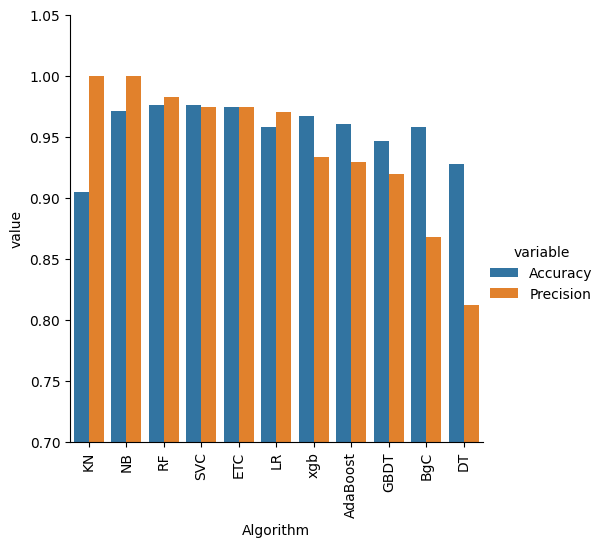

In [56]:
sns.catplot(x="Algorithm", y="value",
            hue="variable", data=performance_df1, kind="bar", height=5)
plt.ylim(0.7, 1.05)
plt.xticks(rotation=90)
plt.show()

## Model improvement
##### 1. change the max features parameter of TfIdf (to 3000) => best performing so used.
##### 2. Scaling was also done but the results didn't improved(Commented out)
##### 3. Appending no. of col to X (commented out)

In [57]:
temp_df = pd.DataFrame({"Algorithm": clfs.keys(), "Accuracy__max_ft_3000": accuracy_scores, "Preision_max_ft_3000": precision_scores}).sort_values(by="Preision_max_ft_3000", ascending=False)
# temp_df = pd.DataFrame({"Algorithm": clfs.keys(), "Accuracy_scaling": accuracy_scores, "Precision_scaling": precision_scores}).sort_values(by="Precision_scaling", ascending=False)

In [58]:
new_df=performance_df.merge(temp_df, on="Algorithm")
new_df

,Algorithm,Accuracy,Precision,Accuracy__max_ft_3000,Preision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.933333,0.967118,0.933333
7,AdaBoost,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217


In [59]:
# Voting Classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [60]:
voting = VotingClassifier(estimators=[('SVC', svc), ('NB', mnb), ('ETC', etc)], voting='soft')

In [61]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('SVC',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('NB', MultinomialNB()),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [62]:
y_pred = voting.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
# no improvement in the model

0.9816247582205029
0.9917355371900827


In [63]:
# Applying Stacking
estimators = [('SVC', svc), ('NB', mnb), ('ETC', etc)]
final_estimator = RandomForestClassifier()
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [64]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision",precision_score(y_test, y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


# fajfsflk

In [65]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))